<a href="https://colab.research.google.com/github/Gabelita/Interpolaci-n-de-Lagrange/blob/main/Interpolacion_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

def lagrange_interpolation(x_points, y_points, x_eval):
    total = 0
    n = len(x_points)
    for i in range(n):
        xi, yi = x_points[i], y_points[i]
        Li = 1
        for j in range(n):
            if i != j:
                Li *= (x_eval - x_points[j]) / (x_points[i] - x_points[j])
        total += yi * Li
    return total

df = pd.read_excel("Proyecto procesamiento.xlsx", sheet_name="Datos")
df.columns = df.columns.str.strip().str.replace('\n', '', regex=True)

x_col = 'Esfuerzo (MPa)'      # Eje X
y_col = 'Deformación (%)'     # Eje Y

df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
n = len(df)

for grado in range(1, 5):
    df[f'Interpolación grado {grado}'] = np.nan
    df[f'Error verdadero grado {grado}'] = np.nan
    df[f'Error relativo (%) grado {grado}'] = np.nan

for i in range(n):
    xi = df.loc[i, x_col]
    yi_real = df.loc[i, y_col]

    # Grado 1
    if 0 < i < n - 1:
        x_pts = [df.loc[i - 1, x_col], df.loc[i + 1, x_col]]
        y_pts = [df.loc[i - 1, y_col], df.loc[i + 1, y_col]]
        y_interp = lagrange_interpolation(x_pts, y_pts, xi)
        df.loc[i, 'Interpolación grado 1'] = y_interp
        df.loc[i, 'Error verdadero grado 1'] = yi_real - y_interp
        df.loc[i, 'Error relativo (%) grado 1'] = abs((yi_real - y_interp) / yi_real) * 100

    # Grado 2
    if i > 1 and i < n - 1:
        x_pts = [df.loc[i - 2, x_col], df.loc[i - 1, x_col], df.loc[i + 1, x_col]]
        y_pts = [df.loc[i - 2, y_col], df.loc[i - 1, y_col], df.loc[i + 1, y_col]]
        y_interp = lagrange_interpolation(x_pts, y_pts, xi)
        df.loc[i, 'Interpolación grado 2'] = y_interp
        df.loc[i, 'Error verdadero grado 2'] = yi_real - y_interp
        df.loc[i, 'Error relativo (%) grado 2'] = abs((yi_real - y_interp) / yi_real) * 100

    # Grado 3
    if i > 2 and i < n - 1:
        x_pts = [df.loc[i - 3, x_col], df.loc[i - 2, x_col], df.loc[i - 1, x_col], df.loc[i + 1, x_col]]
        y_pts = [df.loc[i - 3, y_col], df.loc[i - 2, y_col], df.loc[i - 1, y_col], df.loc[i + 1, y_col]]
        y_interp = lagrange_interpolation(x_pts, y_pts, xi)
        df.loc[i, 'Interpolación grado 3'] = y_interp
        df.loc[i, 'Error verdadero grado 3'] = yi_real - y_interp
        df.loc[i, 'Error relativo (%) grado 3'] = abs((yi_real - y_interp) / yi_real) * 100

    # Grado 4
    if i > 2 and i < n - 2:
        x_pts = [df.loc[i - 3, x_col], df.loc[i - 2, x_col], df.loc[i - 1, x_col],
                 df.loc[i + 1, x_col], df.loc[i + 2, x_col]]
        y_pts = [df.loc[i - 3, y_col], df.loc[i - 2, y_col], df.loc[i - 1, y_col],
                 df.loc[i + 1, y_col], df.loc[i + 2, y_col]]
        y_interp = lagrange_interpolation(x_pts, y_pts, xi)
        df.loc[i, 'Interpolación grado 4'] = y_interp
        df.loc[i, 'Error verdadero grado 4'] = yi_real - y_interp
        df.loc[i, 'Error relativo (%) grado 4'] = abs((yi_real - y_interp) / yi_real) * 100


errores_prom = {
    x_col: "—",
    y_col: "—"
}

for grado in range(1, 5):
    prom = df[f'Error relativo (%) grado {grado}'].mean(skipna=True)
    errores_prom[f'Interpolación grado {grado}'] = "—"
    errores_prom[f'Error verdadero grado {grado}'] = "—"
    errores_prom[f'Error relativo (%) grado {grado}'] = prom

df_final = pd.concat([df, pd.DataFrame([errores_prom])], ignore_index=True)

df_final.to_excel("tabla_interpolaciones_con_errores.xlsx", index=False)
print(" Archivo generado: tabla_interpolaciones_con_errores.xlsx")

for grado in range(1, 5):
    print(f"Error relativo promedio grado {grado}: {df_final[f'Error relativo (%) grado {grado}'].iloc[-1]:.4f}%")

Archivo generado: tabla_interpolaciones_con_errores.xlsx
Error relativo promedio grado 1: 5.0747%
Error relativo promedio grado 2: 21.7927%
Error relativo promedio grado 3: 60.6318%
Error relativo promedio grado 4: 94.1174%



Comparación de errores relativos promedio y desviación estándar:
   Grado  Error relativo promedio (%)  Desviación estándar (%)
0      1                     5.074735                29.248279
1      2                    21.792747               125.137905
2      3                    60.631790               281.285736
3      4                    94.117384               396.293937


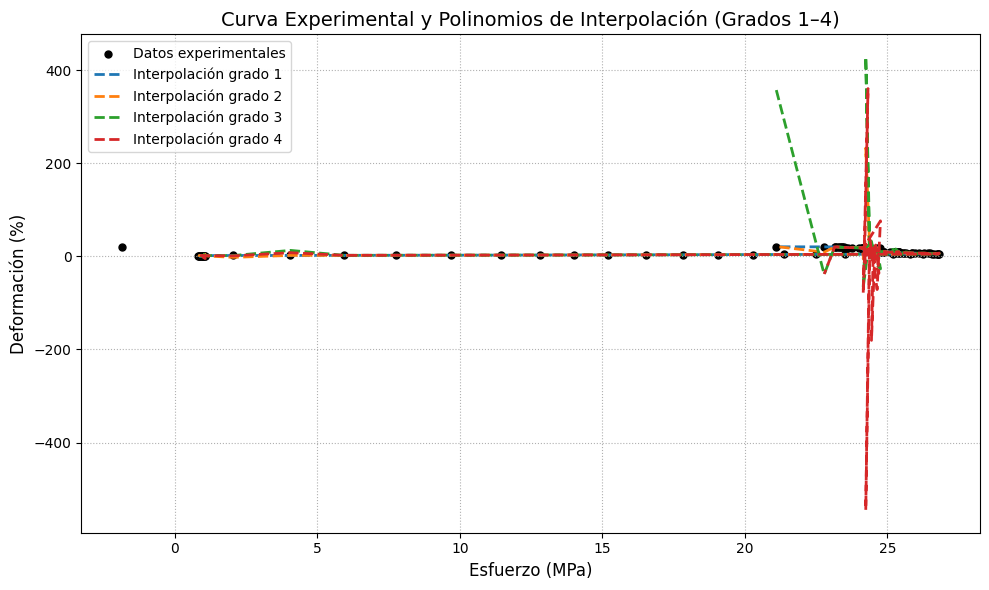

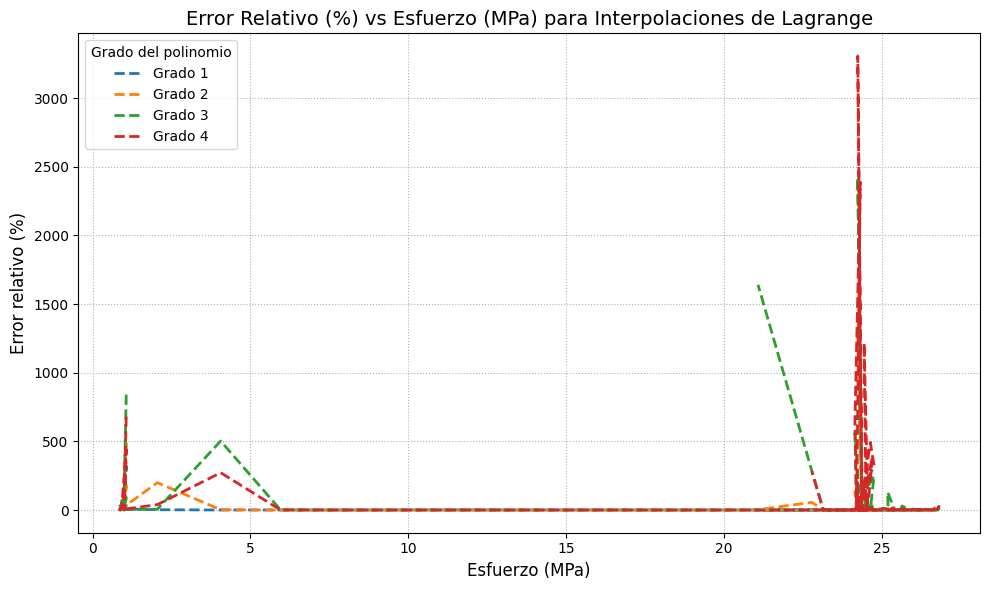

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1️⃣ LEER DATOS DESDE EL EXCEL GENERADO ===
df = pd.read_excel("tabla_interpolaciones_con_errores.xlsx")

x_col = "Esfuerzo (MPa)"
y_col = "Deformación (%)"

# Exclude the last row (summary row) for plotting
df_plot = df.iloc[:-1].copy()

# Ensure numeric types for plotting
df_plot[x_col] = pd.to_numeric(df_plot[x_col], errors='coerce')
df_plot[y_col] = pd.to_numeric(df_plot[y_col], errors='coerce')

resultados = []

for grado in range(1, 5):
    col_error = f"Error relativo (%) grado {grado}"
    if col_error in df.columns:
        # Calculate mean and std on the original df including the summary row for mean
        # but excluding NaNs. The last row contains the overall average error.
        errores = df[col_error].dropna()
        if not errores.empty:
            # The last value is the overall average, calculated previously.
            # We calculate std based on the individual errors excluding the average row.
            errores_for_std = df[col_error].iloc[:-1].dropna()
            promedio = errores.iloc[-1] # Use the pre-calculated average from the last row
            desviacion = errores_for_std.std()

            resultados.append({
                "Grado": grado,
                "Error relativo promedio (%)": promedio,
                "Desviación estándar (%)": desviacion
            })
        else:
             resultados.append({
                "Grado": grado,
                "Error relativo promedio (%)": np.nan,
                "Desviación estándar (%)": np.nan
            })


tabla_resumen = pd.DataFrame(resultados)
print("\n Comparación de errores relativos promedio y desviación estándar:")
print(tabla_resumen)

plt.figure(figsize=(10, 6))

plt.scatter(df_plot[x_col], df_plot[y_col], color='black', label='Datos experimentales', s=25)

for grado in range(1, 5):
    col_interp = f"Interpolación grado {grado}"
    if col_interp in df_plot.columns:
        plot_data = df_plot.dropna(subset=[col_interp])
        plt.plot(plot_data[x_col], plot_data[col_interp], linestyle='--', linewidth=2, label=f'Interpolación grado {grado}')

plt.xlabel("Esfuerzo (MPa)", fontsize=12)
plt.ylabel("Deformación (%)", fontsize=12)
plt.title("Curva Experimental y Polinomios de Interpolación (Grados 1–4)", fontsize=14)
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for grado in range(1, 5):
    col_error = f"Error relativo (%) grado {grado}"
    if col_error in df_plot.columns:
        plot_data = df_plot.dropna(subset=[col_error])
        plt.plot(plot_data[x_col], plot_data[col_error], linestyle='--', linewidth=2, label=f'Grado {grado}')

plt.xlabel("Esfuerzo (MPa)", fontsize=12)
plt.ylabel("Error relativo (%)", fontsize=12)
plt.title("Error Relativo (%) vs Esfuerzo (MPa) para Interpolaciones de Lagrange", fontsize=14)
plt.legend(title="Grado del polinomio")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()